

###  **1. Problem Definition**
- Objective: Classify customer reviews into sentiments (Positive / Negative ).
- Type: Supervised text classification.
- Outcome: Understand customer opinion and improve products or services.

---

###  **2. Data Collection**
- **Sources**:
  - Product reviews


---

###  **3. Data Cleaning & Preprocessing**

- Remove irrelevant symbols (HTML tags, emojis, links)
- Convert text to lowercase
- Remove stopwords (like "the", "is", "and")
- Remove punctuation and numbers (optional)
- Spelling correction (optional but helpful)
- Lemmatization/Stemming (to reduce words to their root form)
- Handle null/missing values


---

###  **4. Exploratory Data Analysis (EDA)**

- **Word frequency analysis**: Most common positive/negative words
- **Sentiment distribution**: How many positives vs negatives?
- **Text length analysis**: Are longer reviews more detailed or emotional?
- **Ratings vs sentiment match** (if available): Does rating 1-5 match the actual sentiment?
- **Class imbalance check**: Are sentiment labels balanced?


---

###  **5. NLP Processing (Text to Numeric Representation)**


  - transformer-based

> 🧬 Contextual embeddings like BERT understand **semantic meaning** and **word order** better than older methods.

---

###  **6. Labeling**

  - Ratings (1–2 = Negative,  3–4–5 = Positive)

---

###  **7. Model Building**

#### Approaches:

| Approach
| Traditional ML

---

###  **8. Model Evaluation**

- **Metrics to use**:
  - Accuracy
  - Precision / Recall / F1-Score
  - Confusion Matrix
  - Auc / Roc


###  **9. Prediction & Inference**


In [ ]:
!pip install emoji

In [ ]:
from google.colab import drive
import pandas as pd
import warnings
import emoji

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = pd.read_csv("/content/drive/MyDrive/task/Sentiment Analysis of Product Reviews/Womens Clothing E-Commerce Reviews.csv", dtype ="str")

In [ ]:
file.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  object
 1   Clothing ID              23486 non-null  object
 2   Age                      23486 non-null  object
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  object
 6   Recommended IND          23486 non-null  object
 7   Positive Feedback Count  23486 non-null  object
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [ ]:
file = file[["Title","Review Text","Rating"]]

### null/ missing value

In [ ]:
file.isnull().sum()

,0
Title,3810
Review Text,845
Rating,0


In [ ]:
# file["Review Text"] = file["Review Text"] +"."+ file["Title"]


In [ ]:
file.isnull().sum()

,0
Title,3810
Review Text,845
Rating,0


In [ ]:
file[(file["Review Text"].isnull()) & (file["Title"].isnull())]

,Title,Review Text,Rating
92,NaN,NaN,5
93,NaN,NaN,5
98,NaN,NaN,5
135,NaN,NaN,4
142,NaN,NaN,5
...,...,...,...
23258,NaN,NaN,4
23301,NaN,NaN,5
23303,NaN,NaN,5
23470,NaN,NaN,5


In [ ]:
missing_index = file[(file["Review Text"].isnull()) & (file["Title"].isnull())].index
file.drop(missing_index, inplace=True)

In [ ]:
file.shape

(22642, 3)

### duplicate value

In [ ]:
file.duplicated().sum()

np.int64(5)

In [ ]:
file.drop_duplicates(inplace=True)

In [ ]:
file.duplicated().sum()

np.int64(0)

### adding new col

In [ ]:
file1 = file.copy()

In [ ]:
file1.head()

,Title,Review Text,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,4
1,NaN,Love this dress! it's sooo pretty. i happene...,5
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5


In [ ]:
file1["text"] = file1["Title"].fillna("") + "." + file1["Review Text"].fillna("")

##  Data Cleaning & Preprocessing




In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
print(stopwords.words('english'))
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

True

In [ ]:
# Import Regular Expression
import re
# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def emoji_text(text):
  if len(text)>0:
    return emoji.demojize(text)
  else:
    text

def remove_punch(text):
  return  re.sub(r'[^\w\s]', '', text)

def token(toke):
  return toke.split()

def merge_token(text):
  return " ".join(text)

def lemmatizations(text):
    lemmatized = [lemmatizer.lemmatize(token) for token in text]
    return ' '.join(lemmatized)

In [ ]:

file1 =  file1.fillna("")
file1['Text_r'] = file1['text'].apply(remove_html_tags)
# remove url
file1['Text_r'] = file1['Text_r'].apply(remove_url)
# emoji
file1['Text_r'] = file1['Text_r'].apply(emoji_text)
# remove punchation
file1['Text_r'] = file1['Text_r'].apply(remove_punch)
# convert lower
file1 = file1.applymap(lambda x: x.lower() if isinstance(x, str) else x )
# token
file1["Text_r"] = file1["Text_r"].apply(token)
# # Remove stopwords
stop = stopwords.words('english')
file1["Text_r"] = file1["Text_r"].apply(lambda x: [item  for item in x if item not in stop])

file1['Text_r'] = file1['Text_r'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

# file1["Text_r"] = file1["lemmatized"].apply(merge_token)


In [ ]:
file1["Rating"].value_counts()

,count
Rating,
5,12536
4,4908
3,2823
2,1549
1,821


In [ ]:
file1["New_rating"]= file1["Rating"].replace({"5": 'Positive',"4":"Positive","3":"Positive","2":"Negative","1":"Negative"})

In [ ]:
file1["Text_r"] = file1["Text_r"].apply(token)

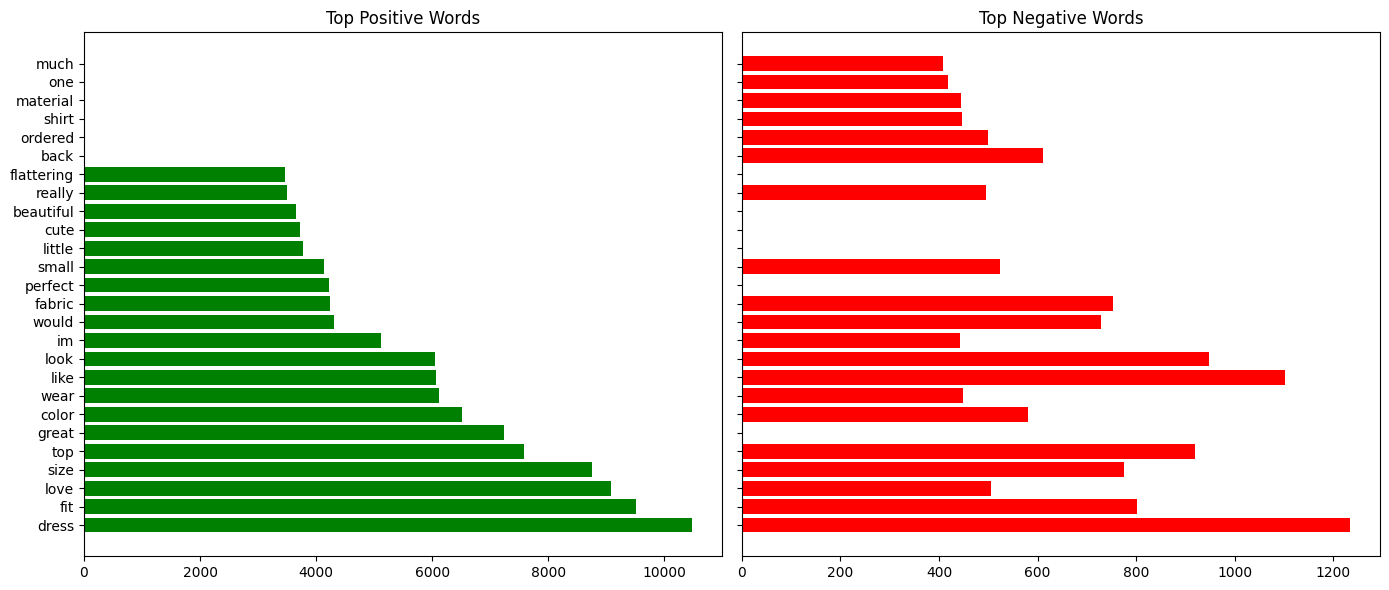

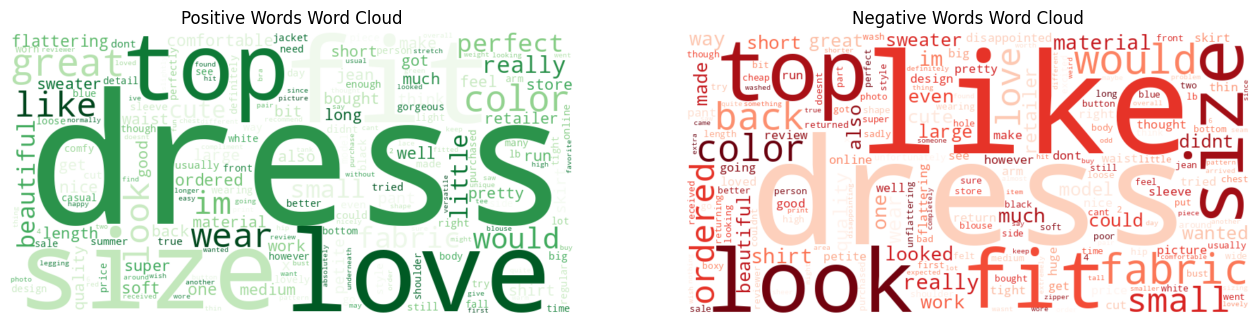

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Split into positive and negative reviews
positive_tokens = file1[file1["New_rating"] == 'Positive']['Text_r'].sum()
negative_tokens = file1[file1["New_rating"] == 'Negative']['Text_r'].sum()

# Count word frequencies
pos_counts = Counter(positive_tokens)
neg_counts = Counter(negative_tokens)

# Get most common N words
N = 20
common_pos = pos_counts.most_common(N)
common_neg = neg_counts.most_common(N)

# Convert to DataFrame for bar plotting
pos_df = pd.DataFrame(common_pos, columns=['word', 'count'])
neg_df = pd.DataFrame(common_neg, columns=['word', 'count'])

# Plot bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax1.barh(pos_df['word'], pos_df['count'], color='green')
ax1.set_title("Top Positive Words")
ax2.barh(neg_df['word'], neg_df['count'], color='red')
ax2.set_title("Top Negative Words")
plt.tight_layout()
plt.show()

# Generate word clouds
pos_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(pos_counts)
neg_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(neg_counts)

# Plot word clouds
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words Word Cloud")

plt.show()


In [ ]:
file1.columns

Index(['Title', 'Review Text', 'Rating', 'text', 'Text_r', 'New_rating'], dtype='object')

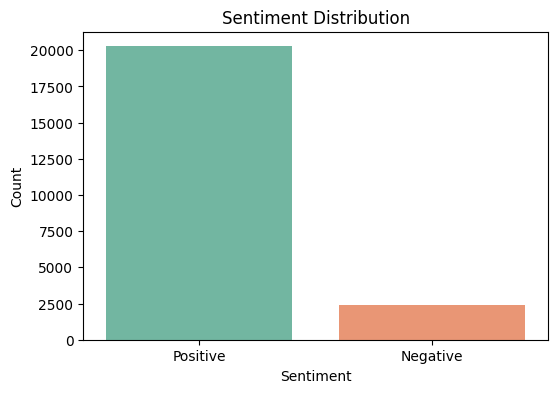

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Load your file

# 1️⃣ Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=file1, x='New_rating', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


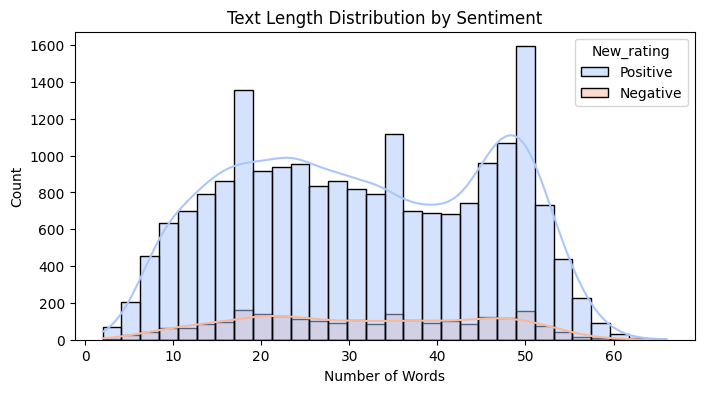

In [ ]:
# file1['text_length'] = file1['Text_r'].apply(lambda x: len(x.split()))
file1['text_length'] = file1['Text_r'].apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(data=file1, x='text_length', hue='New_rating', bins=30, palette='coolwarm', kde=True)
plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


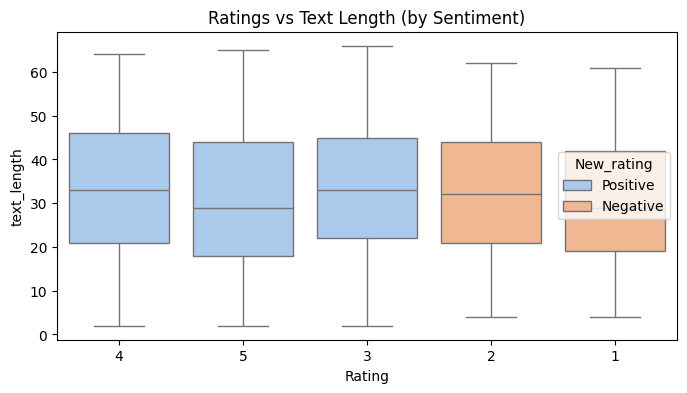

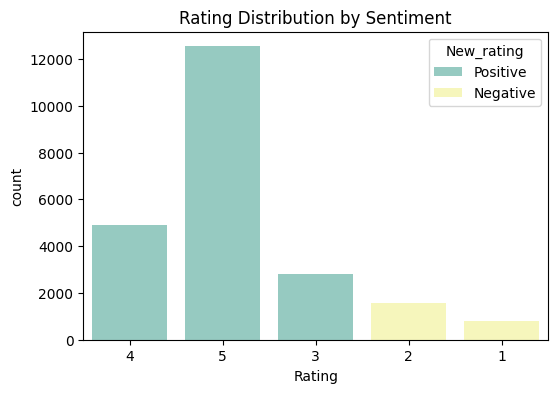

In [ ]:

# 3️⃣ Ratings vs Sentiment Match
if 'Rating' in file1.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Rating', y='text_length', hue='New_rating', data=file1, palette='pastel')
    plt.title("Ratings vs Text Length (by Sentiment)")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.countplot(data=file1, x='Rating', hue='New_rating', palette='Set3')
    plt.title("Rating Distribution by Sentiment")
    plt.show()


Class distribution:
 New_rating
Positive    89.53
Negative    10.47
Name: proportion, dtype: float64


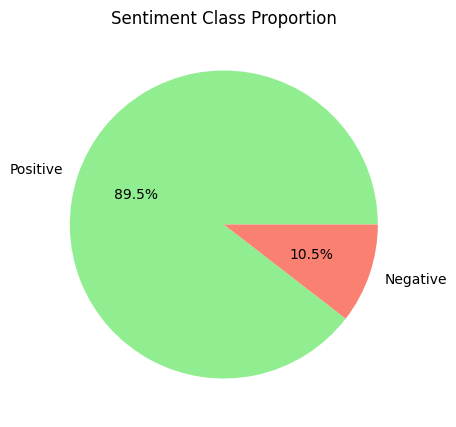

In [ ]:
# 4️⃣ Class Imbalance Check
sentiment_counts = file1['New_rating'].value_counts(normalize=True) * 100
print("Class distribution:\n", sentiment_counts.round(2))

# Optional pie chart
plt.figure(figsize=(5, 5))
file1['New_rating'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Sentiment Class Proportion")
plt.ylabel("")
plt.show()


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load your data (example)
texts = file1['Text_r'].astype(str).tolist()  # column with plain text

# Load pre-trained BERT model for sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # fast & effective

# Generate embeddings (batch processing)
embeddings = model.encode(texts, show_progress_bar=True)

# Convert to DataFrame if needed
import numpy as np
embeddings_df = pd.DataFrame(embeddings)

# Optionally concatenate with original dataframe
final_df = pd.concat([file1, embeddings_df], axis=1)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/708 [00:00<?, ?it/s]

In [ ]:
file1["New_rating"].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
file1["New_rating"] = file1["New_rating"].replace({"Positive":1,"Negative":0})
file1["New_rating"].value_counts()

,count
New_rating,
1,20267
0,2370


In [ ]:
y = file1["New_rating"].astype(int)
x=embeddings_df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)


🔹 Logistic Regression Metrics:
Accuracy: 0.9123233215547704
Precision: 0.8984204812129772
Recall: 0.9123233215547704
F1 Score: 0.8958482756095696

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.29      0.41       474
           1       0.92      0.98      0.95      4054

    accuracy                           0.91      4528
   macro avg       0.81      0.64      0.68      4528
weighted avg       0.90      0.91      0.90      4528



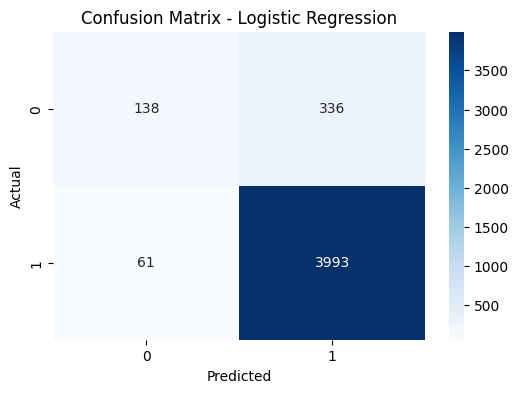


🔹 XGBoost Metrics:
Accuracy: 0.9134275618374559
Precision: 0.9000481349515927
Recall: 0.9134275618374559
F1 Score: 0.8985771884215411

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.31      0.43       474
           1       0.92      0.98      0.95      4054

    accuracy                           0.91      4528
   macro avg       0.81      0.65      0.69      4528
weighted avg       0.90      0.91      0.90      4528



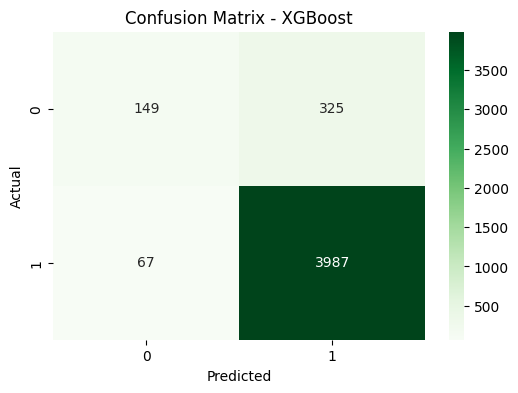

In [ ]:

# ---------- Logistic Regression ----------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("\n🔹 Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Precision:", precision_score(y_test, lr_preds, average='weighted'))
print("Recall:", recall_score(y_test, lr_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, lr_preds, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))

# Confusion Matrix for LR
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- XGBoost ----------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("\n🔹 XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds, average='weighted'))
print("Recall:", recall_score(y_test, xgb_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, xgb_preds, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))

# Confusion Matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, log_loss, cohen_kappa_score, matthews_corrcoef


# Logistic Regression metrics (example for binary)
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1], multi_class='ovr'))
print("Log Loss:", log_loss(y_test, lr.predict_proba(X_test)))
print("MCC:", matthews_corrcoef(y_test, lr_preds))
print("Cohen Kappa:", cohen_kappa_score(y_test, lr_preds))


ROC AUC: 0.9092915472346944
Log Loss: 0.21357773074909706
MCC: 0.4123491671668599
Cohen Kappa: 0.37117534872592084


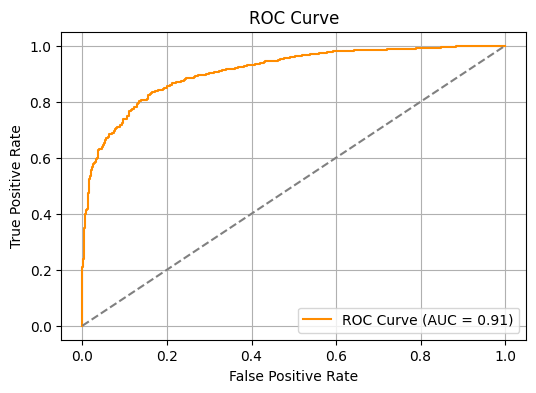

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


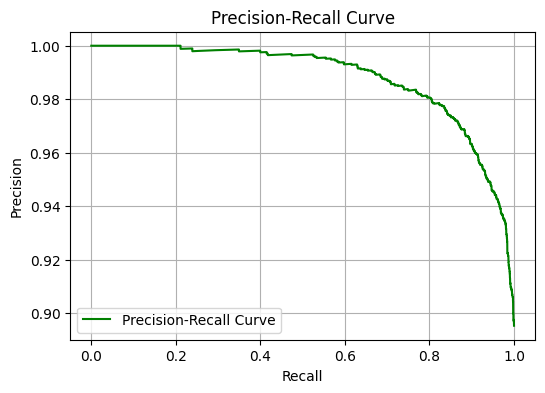

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
joblib.dump(lr, "product_revie_lr.pkl")
joblib.dump(xgb, 'xgboost_model.pkl')


['xgboost_model.pkl']

# inference

In [ ]:
!pip install emoji

In [ ]:
import joblib
import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np


### data cleaning

In [ ]:
# Load Logistic Regression
lr_loaded = joblib.load('/content/product_revie_lr.pkl')

# Load XGBoost
xgb_loaded = joblib.load('/content/xgboost_model.pkl')


### embedding and nlp process

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # fast & effective

def input(review):
  embeddings = model.encode([review])
  return embeddings


class SimpleTextCleaner:
    def __init__(self):
        self.stop = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean(self, text):
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = emoji.demojize(text)
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        tokens = text.split()
        tokens = [t for t in tokens if t not in self.stop]
        tokens = [self.lemmatizer.lemmatize(t) for t in tokens]
        return ' '.join(tokens)



In [ ]:
cleaner = SimpleTextCleaner()
sample = "Absolutely wonderful! 😍 Check it out at https://example.com"
clean_text = cleaner.clean(sample)
print('user input ', sample)

print('clean_text', clean_text)
# Output: absolutely wonderful check

user input  Absolutely wonderful! 😍 Check it out at https://example.com
clean_text absolutely wonderful smiling_face_with_hearteyes check


In [ ]:
clean_text = input(clean_text)
y_pred= lr.predict(np.array(clean_text))
y_pred

array([1])